In [50]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, log_loss
from matplotlib import pyplot as plt
import xgboost as XGB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import time
from wordcloud import WordCloud
import re
from sklearn.impute import SimpleImputer

%matplotlib inline

In [2]:
#loading the data
train = pd.read_csv('./data/train.csv')
train_target = pd.read_csv('./data/train_target_and_scores.csv')
test = pd.read_csv('./data/test.csv')

C:\Users\yacin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## EDA :

In [3]:
pd.set_option('display.max_columns', None)
train.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110938 entries, 0 to 110937
Columns: 190 entries, id to away_team_history_league_id_10
dtypes: float64(162), int64(2), object(26)
memory usage: 160.8+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72711 entries, 0 to 72710
Columns: 189 entries, id to away_team_history_league_id_10
dtypes: bool(1), float64(162), int64(2), object(24)
memory usage: 104.4+ MB


In [6]:
train_target.head()

,id,score,target
0,11906497,2-3,away
1,11984383,1-0,home
2,11983301,2-2,draw
3,11983471,1-2,away
4,11883005,1-0,home


In [7]:
train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110938 entries, 0 to 110937
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      110938 non-null  int64 
 1   score   110938 non-null  object
 2   target  110938 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


### Nottoyage des données : 

#### Should we keep the league_id column or not?

In [8]:
train["league_name"].value_counts()[train["league_name"].value_counts() > 100]

Premier League                      5565
Club Friendlies                     3724
Primera Division                    2369
Super League                        1530
3. Liga                             1327
                                    ... 
Ligat Al Women                       102
Oberliga: Bremen                     102
Coppa Italia                         101
Primera D Metropolitana              101
Western Australia State League 1     101
Name: league_name, Length: 299, dtype: int64

In [9]:
text = " ".join(re.sub("[\W]+", "_", str(league).lower().strip()) for league in train["league_name"].to_numpy())

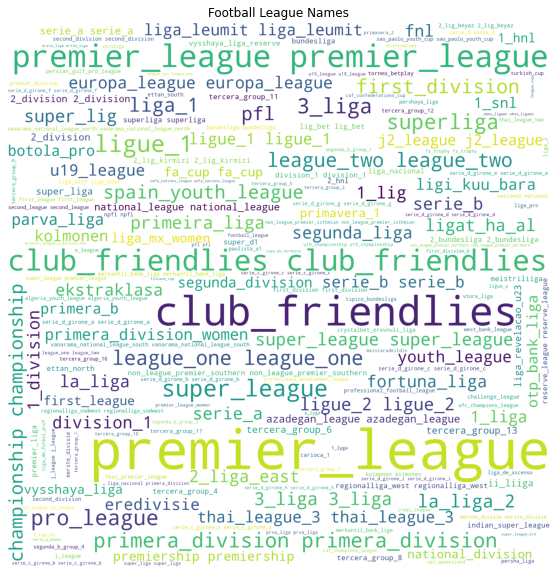

In [10]:
wordcloud = WordCloud(background_color = 'white',
                      height =2000,
                      width = 2000
                     ).generate(text)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Football League Names")
plt.show()

<AxesSubplot:>

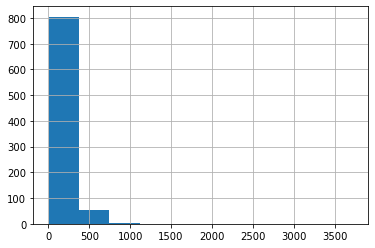

In [11]:
train["league_id"].value_counts().hist()

In [12]:
print(len(train["league_id"].unique()))

train["league_id"].value_counts()[train["league_id"].value_counts() > 200]

## We have only 202 from 862 league_id's with more than 200 occurences in the dataset 

862


1101    3725
9        858
1936     775
14       751
12       731
        ... 
1330     202
1314     202
1642     201
1261     201
1409     201
Name: league_id, Length: 202, dtype: int64

In [13]:
#League_id column
print("Number of unique league ids in training and test set", len(set(test["league_id"].unique()).union(set(train["league_id"].unique()))))

#symmetrical difference between league ids of the training set and the test set 
sym = set(train["league_id"].unique()).difference(set(test["league_id"].unique())).union(set(test["league_id"].unique()).difference(set(train["league_id"].unique())))
print("\nNumber of league ids in one set and not in the other (training and test set) : ", len(sym))

diff = set(test["league_id"].unique()).difference(set(train["league_id"].unique()))
print("\nNumber of league ids in test set and not in the training set (training and test set) : ", len(diff))

Number of unique league ids in training and test set 1000

Number of league ids in one set and not in the other (training and test set) :  255

Number of league ids in test set and not in the training set (training and test set) :  138


#### Droping useless columns :


In [14]:
cup_features = [col for col in train.columns if "cup" in col ]
coach_features = [col for col in train.columns if "coach" in col and "history" in col]
more_useless_features = [col for col in train.columns if "is_play_home" in col] 
less_important = ["id", "home_team_name","away_team_name" , "league_name", "home_team_coach_id", "away_team_coach_id",  "is_cup"]
less_important.extend( coach_features + cup_features + more_useless_features)

In [15]:
new_train = train.drop(less_important, axis=1)
new_test= test.drop(less_important, axis=1)

#### Dealing with NAN values : 

<AxesSubplot:>

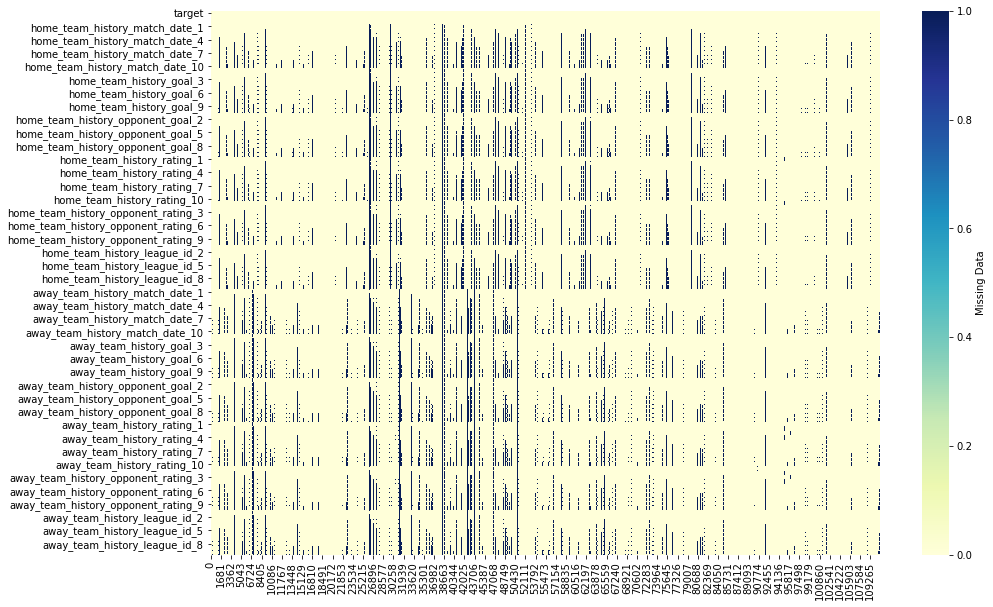

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(new_train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

<AxesSubplot:>

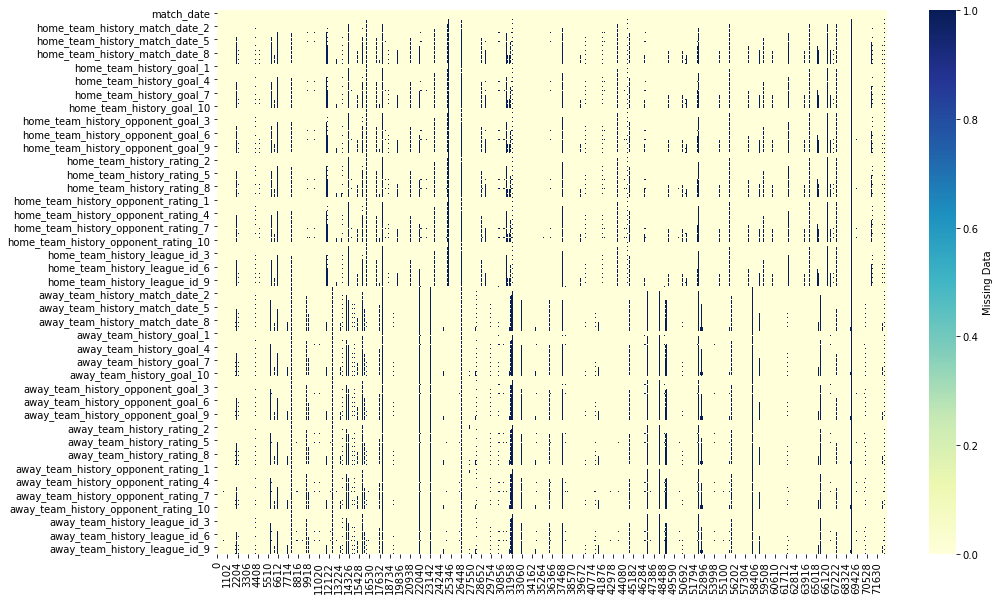

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(new_test.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [18]:
#number of columns with more than 5000 missing values 
sum(new_train.isna().sum() > 5000)

84

In [19]:
# Pourcentage des nulls toléré 
# nombre de collones avec plus que "pourcentage" de valeurs nulls
porucentage = 0.15
len(new_train.isna().sum()[new_train.isna().sum() > porucentage*new_train.shape[0]]) 

0

In [20]:
# Null values in the testset
new_test.isna().sum()[new_test.isna().sum() > 5000] 

home_team_history_match_date_9          5402
home_team_history_match_date_10         6064
home_team_history_goal_9                5402
home_team_history_goal_10               6064
home_team_history_opponent_goal_9       5402
home_team_history_opponent_goal_10      6064
home_team_history_rating_9              5415
home_team_history_rating_10             6080
home_team_history_opponent_rating_9     5415
home_team_history_opponent_rating_10    6080
home_team_history_league_id_9           5402
home_team_history_league_id_10          6064
away_team_history_match_date_9          5646
away_team_history_match_date_10         6308
away_team_history_goal_9                5646
away_team_history_goal_10               6308
away_team_history_opponent_goal_9       5646
away_team_history_opponent_goal_10      6308
away_team_history_rating_9              5658
away_team_history_rating_10             6318
away_team_history_opponent_rating_9     5658
away_team_history_opponent_rating_10    6318
away_team_

In [66]:
new_train1 = new_train.copy()
new_test1 = new_test.copy()

In [48]:
categorical_features = [col for col in new_train.columns if "league_id" in col]
categorical_nan = [col for col in categorical_features if new_train[col].isna().sum()>0]
print(categorical_nan)

['home_team_history_league_id_1', 'home_team_history_league_id_2', 'home_team_history_league_id_3', 'home_team_history_league_id_4', 'home_team_history_league_id_5', 'home_team_history_league_id_6', 'home_team_history_league_id_7', 'home_team_history_league_id_8', 'home_team_history_league_id_9', 'home_team_history_league_id_10', 'away_team_history_league_id_1', 'away_team_history_league_id_2', 'away_team_history_league_id_3', 'away_team_history_league_id_4', 'away_team_history_league_id_5', 'away_team_history_league_id_6', 'away_team_history_league_id_7', 'away_team_history_league_id_8', 'away_team_history_league_id_9', 'away_team_history_league_id_10']


In [82]:
imp_freq = SimpleImputer( strategy='constant', fill_value= -1)
imp_freq.fit(new_train[categorical_features])

new_train1[categorical_features] = imp_freq.transform(new_train[categorical_features])
new_test1[categorical_features] = imp_freq.transform(new_test1[categorical_features])

In [83]:
numerical_features  = [col for col in new_train.columns if col not in categorical_features and col != "target"]
numerical_nan = [col for col in numerical_features if new_train[col].isna().sum()>0]

In [84]:
imp_med = SimpleImputer( strategy='median')
imp_med.fit(new_train[numerical_features])

new_train1[numerical_features] = imp_med.transform(new_train[numerical_features])
new_test1[numerical_features]= imp_med.transform(new_test1[numerical_features])

### Feature engineering : 

In [21]:
# get column names with string "date"
cols = [_ for _ in new_train.columns if 'date' in _]

# convert to datetime
for c in cols:
    new_train.loc[:, c] = pd.to_datetime(new_train.loc[:, c])
    new_test.loc[:, c] = pd.to_datetime(new_test.loc[:, c])
    

###### Creating a column that counts number of days since previous historical matchs for a game
###### for training and test set



In [22]:
for i in range(1,11):
    new_train.loc[:, f'home_days_since_match_{i}'] = (new_train['match_date'] - new_train[f'home_team_history_match_date_{i}']).dt.days
    new_train.loc[:, f'away_days_since_match_{i}'] = (new_train['match_date'] - new_train[f'away_team_history_match_date_{i}']).dt.days

cols = [_ for _ in new_train.columns if 'match_date' in _]
new_train.drop(cols, axis=1, inplace=True)


In [23]:
for i in range(1,11):
    new_test.loc[:, f'home_days_since_match_{i}'] = (new_test['match_date'] - new_test[f'home_team_history_match_date_{i}']).dt.days
    new_test.loc[:, f'away_days_since_match_{i}'] = (new_test['match_date'] - new_test[f'away_team_history_match_date_{i}']).dt.days

new_test.drop(cols, axis=1, inplace=True)


###### Creating a column that calculates the goal difference
###### for training and test set


In [24]:
for i in range(1,11):
    new_train[f"home_team_history_result_{i}"] = new_train[f"home_team_history_goal_{i}"] - new_train[f"home_team_history_opponent_goal_{i}"]
    new_train[f"away_team_history_result_{i}"] = new_train[f"away_team_history_goal_{i}"] - new_train[f"away_team_history_opponent_goal_{i}"]
    new_train.drop([f"home_team_history_goal_{i}", f"home_team_history_opponent_goal_{i}", f"away_team_history_opponent_goal_{i}", f"away_team_history_goal_{i}"] ,axis=1, inplace=True)
#new_train[].apply(lambda row : row["home_team_history_goal_1"] > row["home_team_history_opponent_goal_1"] , axis=1)
#if new_train[f"home_team_history_result_1"]
#    new_train[f"home_team_history_result_1"]

In [25]:
for i in range(1,11):
    new_test[f"home_team_history_result_{i}"] = new_test[f"home_team_history_goal_{i}"] - new_test[f"home_team_history_opponent_goal_{i}"]
    new_test[f"away_team_history_result_{i}"] = new_test[f"away_team_history_goal_{i}"] - new_test[f"away_team_history_opponent_goal_{i}"]
    new_test.drop([f"home_team_history_goal_{i}", f"home_team_history_opponent_goal_{i}", f"away_team_history_opponent_goal_{i}", f"away_team_history_goal_{i}"] ,axis=1, inplace=True)


###### Creating a column that counts goal difference over the last 10 games
###### for training and test set

In [26]:
home_goal_columns = [f"home_team_history_result_{i}" for i in range(1,11)]
away_goal_columns = [f"away_team_history_result_{i}" for i in range(1,11)]

In [27]:
new_train[f"home_team_history_goal_difference_10_matches"] = new_train[home_goal_columns].apply(np.sum, axis=1)
new_train[f"away_team_history_goal_difference_10_matches"] = new_train[away_goal_columns].apply(np.sum, axis=1)

In [28]:
new_test[f"home_team_history_goal_difference_10_matches"] = new_test[home_goal_columns].apply(np.sum, axis=1)
new_test[f"away_team_history_goal_difference_10_matches"] = new_test[away_goal_columns].apply(np.sum, axis=1)

In [29]:
new_train.head()

,target,league_id,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10,home_days_since_match_1,away_days_since_match_1,home_days_since_match_2,away_days_since_match_2,home_days_since_match_3,away_days_since_match_3,home_days_since_match_4,away_days_since_match_4,home_days_since_match_5,away_days_since_match_5,home_days_since_match_6,away_days_since_match_6,home_days_since_match_7,away_days_since_match_7,home_days_since_match_8,away_days_since_match_8,home_days_since_match_9,away_days_since_match_9,home_days_since_match_10,away_days_since_match_10,home_team_history_result_1,away_team_history_result_1,home_team_history_result_2,away_team_history_result_2,home_team_history_result_3,away_team_history_result_3,home_team_history_result_4,away_team_history_result_4,home_team_history_result_5,away_team_history_result_5,home_team_history_result_6,away_team_history_result_6,home_team_history_result_7,away_team_history_result_7,home_team_history_result_8,away_team_history_result_8,home_team_history_result_9,away_team_history_result_9,home_team_history_result_10,away_team_history_result_10,home_team_history_goal_difference_10_matches,away_team_history_goal_difference_10_matches
0,away,636,3.856860,5.724370,4.335091,6.678853,5.478300,5.858534,3.641945,7.957243,4.326252,7.106259,5.199840,3.694033,5.131156,3.193161,4.080169,3.898775,7.672377,2.864026,4.814193,3.454310,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0,4.598000,11.825567,9.374867,8.265660,10.769583,4.680350,6.429871,12.773025,10.970814,5.924407,5.253225,2.819962,3.114820,3.283603,2.574183,5.887331,4.570225,2.843268,3.057739,4.684664,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0,5.0,7.0,20.0,16.0,27.0,20.0,32.0,28.0,42.0,32.0,57.0,39.0,63.0,43.0,69.0,50.0,76.0,55.0,90.0,60.0,-1.0,-1.0,2.0,2.0,-1.0,-1.0,-4.0,1.0,2.0,1.0,0.0,-1.0,0.0,0.0,2.0,2.0,0.0,2.0,3.0,2.0,3.0,7.0
1,home,752,13.668800,5.967622,9.130611,5.732981,7.804064,6.743764,6.237028,12.616250,8.334650,8.172615,3.671610,6.121228,3.320450,5.766069,4.118071,4.223164,5.260700,3.102806,5.627457,4.256165,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,6.000588,4.692008,4.461575,5.301500,8.290211,5.260700,4.928

In [30]:
new_test.head()

,league_id,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10,home_days_since_match_1,away_days_since_match_1,home_days_since_match_2,away_days_since_match_2,home_days_since_match_3,away_days_since_match_3,home_days_since_match_4,away_days_since_match_4,home_days_since_match_5,away_days_since_match_5,home_days_since_match_6,away_days_since_match_6,home_days_since_match_7,away_days_since_match_7,home_days_since_match_8,away_days_since_match_8,home_days_since_match_9,away_days_since_match_9,home_days_since_match_10,away_days_since_match_10,home_team_history_result_1,away_team_history_result_1,home_team_history_result_2,away_team_history_result_2,home_team_history_result_3,away_team_history_result_3,home_team_history_result_4,away_team_history_result_4,home_team_history_result_5,away_team_history_result_5,home_team_history_result_6,away_team_history_result_6,home_team_history_result_7,away_team_history_result_7,home_team_history_result_8,away_team_history_result_8,home_team_history_result_9,away_team_history_result_9,home_team_history_result_10,away_team_history_result_10,home_team_history_goal_difference_10_matches,away_team_history_goal_difference_10_matches
0,755,4.134982,5.579979,4.604694,4.405645,3.802064,4.641138,4.703983,4.218740,4.382131,5.234275,7.460100,6.035358,7.761637,6.151000,10.470336,7.210415,6.590811,7.822580,7.530525,7.054200,1116.0,755.0,1116.0,755.0,755.0,1116.0,755.0,755.0,1116.0,755.0,6.038947,4.514535,4.437450,4.589986,3.701850,4.521075,4.972890,3.150812,7.084988,5.106171,4.721590,6.953965,6.535228,5.782611,7.538950,8.428800,4.922229,6.796484,3.809293,6.721784,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,2.0,4.0,7.0,13.0,9.0,19.0,14.0,27.0,19.0,39.0,24.0,47.0,29.0,51.0,41.0,54.0,45.0,63.0,48.0,70.0,0.0,0.0,3.0,-1.0,1.0,0.0,0.0,-3.0,0.0,-2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,-2.0,-1.0,4.0,-3.0
1,743,5.174083,6.889300,6.160500,4.576700,6.855450,4.926512,3.820850,4.743661,4.506815,4.383694,6.539067,5.229670,4.826091,10.026250,5.766350,7.477787,7.147050,5.350118,5.939480,6.051662,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,6.603333,5.947966,6.384433,6.715850,4.679800,5.040744,6.765418,6.203948,4.995129,

## Training of our models : 

In [31]:
x = new_train.drop("target", axis=1)
x = x[:]
y = new_train["target"]
y = y[:]

nbr_features = x.shape[1]

In [32]:
test_size=0.2
random_state=21
X_train, X_cv, y_train, y_cv = train_test_split(x, y, test_size=test_size, random_state=random_state)

#### XGBoost Model :

In [33]:
# This set of parameters has been chosen with cross validation over what we called here X_cv and y_cv
# To better explore the parameters space and not waste time training many models in vane, we tried to tweak the parameters 
# manually to better explore this space, for example when we see that our model is overfitting the dataset, we don't need to 
# to try to increase the number of estimators (n_estimators) or increase the learning rate.
# we keep track of all our results in a file "results.csv"

params = {'n_estimators' : 400,
            'max_depth' : 3,
          "learning_rate" : 0.08
         }
xgbModel = XGB.XGBClassifier(objective='multi:softprob', random_state=random_state,verbosity=1, **params)

In [34]:
start = time.time()
xgbModel.fit(X_train, y_train)
end = time.time()
cross_val_fit_time = round((end-start)/60, 2)
print("\nExecution time in minutes: {:.2f}".format(cross_val_fit_time))

C:\Users\yacin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Execution time in minutes: 5.18


In [36]:
predictions_cv = xgbModel.predict_proba(X_cv) 
log_loss_error_cv = log_loss( y_cv , predictions_cv)     # multinomial log-loss estimation on the training set
print("Multinomial log loss error on Cross validation is : ",log_loss_error_cv)

Multinomial log loss error on Cross validation is :  1.0131214032268978


In [37]:
predictions_cv.mean(axis=0)

array([0.31695217, 0.24889953, 0.43414792], dtype=float32)

In [108]:
predictions_train = xgbModel.predict_proba(X_train) 
log_loss_error_train = log_loss( y_train , predictions_train)     # multinomial log-loss estimation on the training set
print("Multinomial log loss error on the training set is : ",log_loss_error_train)

Multinomial log loss error on the training set is :  0.9779871555600788


In [109]:
f = open("results.csv" , "a")

#First line in the file
#f.write(f"n_estimators, max_depth, learning_rate, nbr_features, test_size, random_state,  log_loss_error_cv, log_loss_error_train, cross_val_fit_time, features_used ")

f.write(f"\n{params['n_estimators']}, {params['max_depth']}, {params['learning_rate']}, {nbr_features}, {test_size}, {random_state},   {log_loss_error_cv:.5f},  {log_loss_error_train:.5f}, {cross_val_fit_time}, {x.columns.tolist()}")
f.close()

#### Random forest model : 

In [94]:
new_train1.isna().sum()

target                                          0
league_id                                       0
home_team_history_rating_1                      0
home_team_history_rating_2                      0
home_team_history_rating_3                      0
                                               ..
away_team_history_result_9                      0
home_team_history_result_10                     0
away_team_history_result_10                     0
home_team_history_goal_difference_10_matches    0
away_team_history_goal_difference_10_matches    0
Length: 104, dtype: int64

In [97]:
x1 = new_train1.drop("target", axis=1)
y1 = new_train1["target"]

In [99]:
rfModel = RandomForestClassifier(n_jobs=-1, random_state=22)
parameters_rf = {
    'n_estimators' : [200, 250, 300, 350, 400] #300, 400, 500,]
}

In [100]:
grid = GridSearchCV(estimator = rfModel, param_grid = parameters_rf, scoring='neg_log_loss', cv= 3, n_jobs=-1, verbose=4, return_train_score=True)

In [101]:
grid.fit(x1, y1)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=22),
             n_jobs=-1, param_grid={'n_estimators': [200]},
             return_train_score=True, scoring='neg_log_loss', verbose=4)

In [102]:
# Results of our K-fold cross validation
res = pd.DataFrame(grid.cv_results_)
res[["params","mean_fit_time",'mean_train_score','mean_test_score']]

,params,mean_fit_time,mean_train_score,mean_test_score
0,{'n_estimators': 200},99.775737,-0.261832,-1.03573


In [188]:
best = grid.best_estimator_

In [110]:
xgbModel.fit(x,y)

C:\Users\yacin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:25:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.08, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=360, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=21, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=1)

In [111]:
pp = xgbModel.predict_proba(x) 

In [112]:
log_loss_error = log_loss( y , pp)     # multinomial log-loss estimation on the training set
print(log_loss_error)

0.9838006406252555


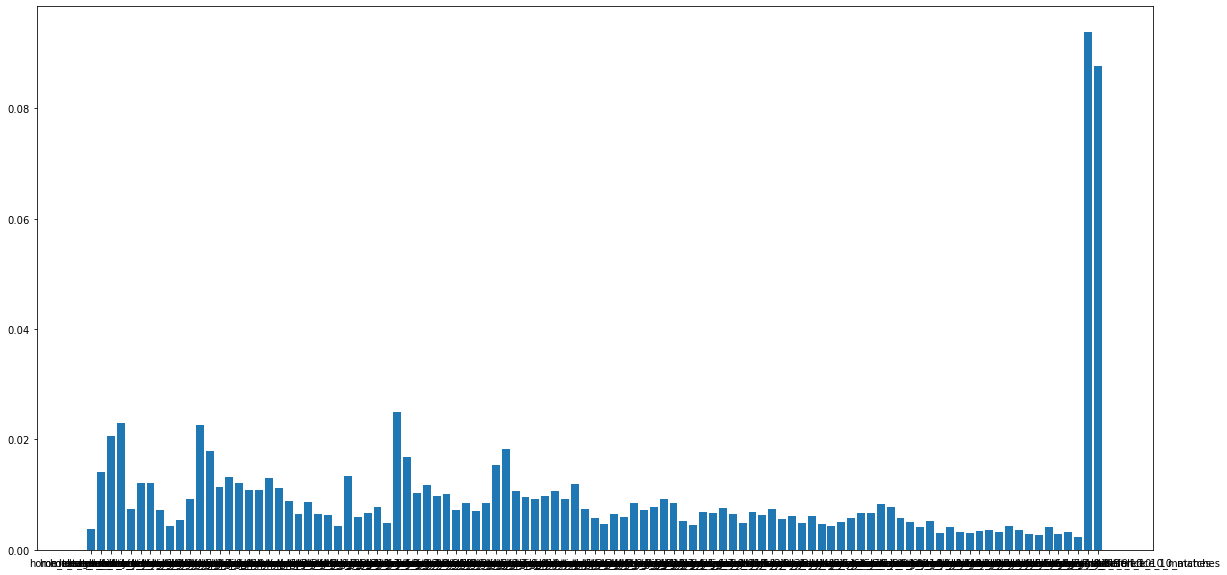

In [113]:
plt.figure(figsize=(20,10))
plt.bar(x.columns[:], xgbModel.feature_importances_[:], )
plt.show()

In [115]:
feature_importance_serie = pd.Series(index = x.columns[:], data= xgbModel.feature_importances_[:], )
feature_importance_serie[feature_importance_serie > 0.012]

home_team_history_rating_1                      0.014050
home_team_history_rating_2                      0.020558
home_team_history_rating_3                      0.022917
home_team_history_rating_5                      0.012028
home_team_history_rating_6                      0.012035
home_team_history_opponent_rating_1             0.022681
home_team_history_opponent_rating_2             0.017834
home_team_history_opponent_rating_4             0.013277
home_team_history_opponent_rating_5             0.012142
home_team_history_opponent_rating_8             0.013074
home_team_history_league_id_6                   0.013402
away_team_history_rating_1                      0.025060
away_team_history_rating_2                      0.016786
away_team_history_opponent_rating_1             0.015372
away_team_history_opponent_rating_2             0.018296
home_team_history_goal_difference_10_matches    0.093787
away_team_history_goal_difference_10_matches    0.087663
dtype: float32

In [160]:
predictions = xgbModel.predict_proba(new_test) 

In [161]:
predictions.mean(axis=0)

array([0.32066756, 0.24624829, 0.43307945], dtype=float32)

In [162]:
xgbModel.classes_

array(['away', 'draw', 'home'], dtype=object)

In [163]:
xgbModel

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.08, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=360, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=21, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=1)

In [165]:
submission = pd.DataFrame(predictions ,columns=xgbModel.classes_)

#do not forget the id column
submission['id'] = test['id']
assert submission.shape[0]== 72711
#submit!
submission.to_csv('./submissions/submission8.csv', index=False)
submission.head()

,away,draw,home,id
0,0.267501,0.324688,0.407812,17761448
1,0.334935,0.305617,0.359448,17695487
2,0.308347,0.302564,0.389089,17715496
3,0.476290,0.305964,0.217747,17715493
4,0.256025,0.295813,0.448163,17715492
